#### Author: Gabriel Dornella Fernandes Bastos
#### Project available at: https://github.com/gabrieldornella/capstone-project

### Goal:
To develop a sophisticated system for companies that will utilize CRM data and AI to deeply understand customer profiles and behaviors. This system aims to revolutionize client outreach programs.

### Key Features:

#### Client Profile Categorization:
- Utilize advanced data analytics to categorize client profiles.
- Analyze historical CRM data to identify common customer preferences and needs.
- Implement AI algorithms to detect subtle patterns and trends in customer behavior.
- Customized Outreach Programs:

#### Develop AI-driven strategies to create personalized outreach programs.
- Ensure targeted communication, focusing on high-propensity clients to enhance response rates and ROI.
- Streamline marketing efforts, reducing costs associated with low-yield outreach.

#### Data-Driven Decision Making:
- Employ machine learning models to predict customer responses to various outreach initiatives.
- Integrate Exploratory Data Analysis (EDA) to continuously refine customer segmentation and outreach tactics.
- Leverage predictive analytics for proactive customer engagement strategies.

### Benefits:
#### Cost Efficiency:
Minimize expenses on sales calls, emails, and letters directed at low-interest customers.
#### Enhanced Customer Experience:
Deliver more relevant, personalized customer interactions that resonate with individual preferences and needs.
#### Data Utilization:
Transform CRM data into actionable insights, driving more informed business decisions and strategies.

### Case Study: Predictive Analysis in Banking Sector

As part of this project, I conducted an Exploratory Data Analysis on a banking dataset.
Developed an AI model to predict customer responses to a campaign, specifically focusing on subscription to term deposits.
This case study demonstrates the practical application of the system in real-world scenarios, showcasing its potential to significantly improve customer engagement and success.

In [1]:
# import libraries
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, Normalizer, PowerTransformer,FunctionTransformer, StandardScaler

from sklearn.exceptions import DataConversionWarning

import warnings
warnings.filterwarnings('ignore')

## 🎲 Data Import

In [2]:
data = pd.read_csv('../data/bank/bank-full.csv', delimiter=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## 🚧 Basic Feature Engineering

In [5]:
# Create a y numeric (0,1) variable
data['y_numeric'] = data['y'].map({'yes':1,'no':0})

## 📊 Eploratory Data Analysis

In [6]:
## Baseline
print('Baseline - Has the client subscribed a term deposit? (binary: "yes","no")')
print(f"% no: {round(data.y.value_counts(normalize=True)[0]*100,3)}%")
print(f"% yes: {round(data.y.value_counts(normalize=True)[1]*100,3)}%")
print("------")
print(f"no: {round(data.y.value_counts()[0],3)}")
print(f"yes: {round(data.y.value_counts()[1],3)}")

Baseline - Has the client subscribed a term deposit? (binary: "yes","no")
% no: 88.302%
% yes: 11.698%
------
no: 39922
yes: 5289


In [7]:
baseline = round(data.y.value_counts(normalize=True)[1]*100,3)

<Axes: xlabel='y', ylabel='count'>

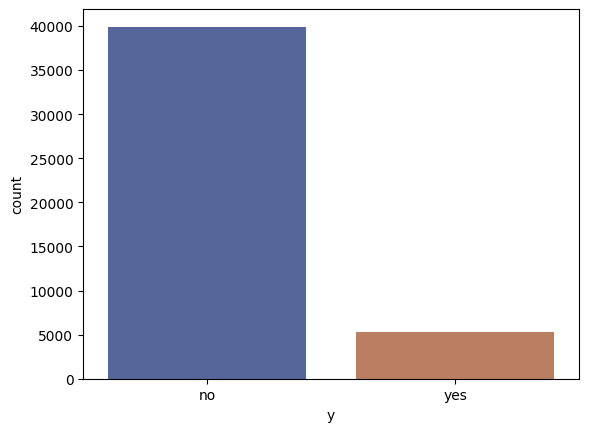

In [8]:
sns.countplot(data,x='y', palette="dark", alpha=.7)

<Figure size 1500x500 with 0 Axes>

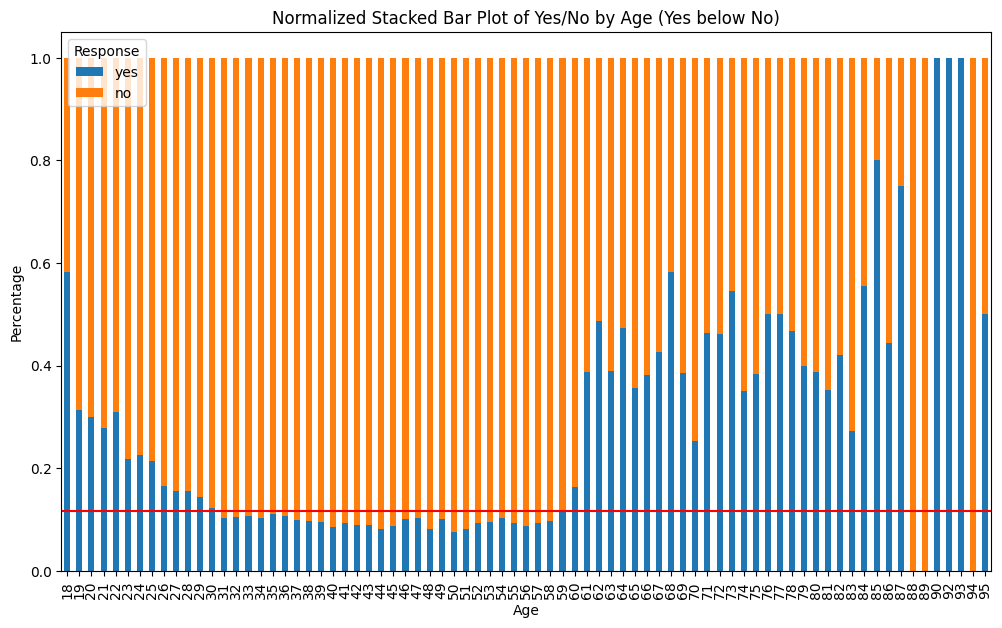

In [9]:
# Analysis by age
# Preparing data for normalized stacked bar plot
grouped = data.groupby(['age', 'y']).size().unstack(fill_value=0)
normalized_grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Reordering the 'yes' and 'no' in the normalized dataframe
reordered_normalized_grouped = normalized_grouped[['yes', 'no']]

# Plotting the reordered stacked bar plot
plt.figure(figsize=(15, 5))
reordered_normalized_grouped.plot(kind='bar', stacked=True, figsize=(12, 7))

plt.title('Normalized Stacked Bar Plot of Yes/No by Age (Yes below No)')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.legend(title='Response', loc='upper left')
plt.axhline(y=0.11698, color='r', linestyle='-')

plt.show()

Text(0, 0.5, 'Count')

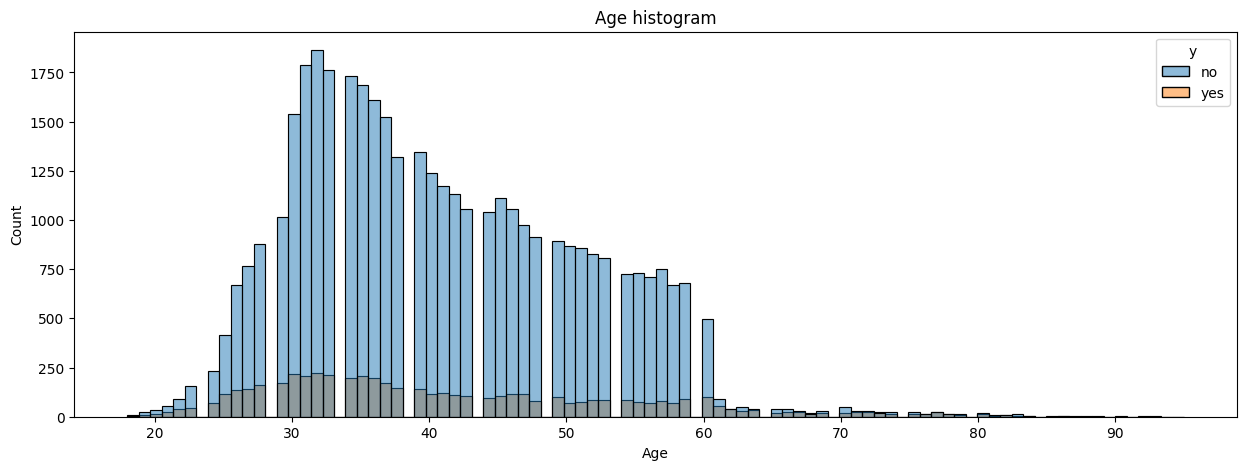

In [10]:
# Age histrogram
plt.figure(figsize=(15, 5))
sns.histplot(data,x='age',hue='y')
plt.title('Age histogram')
plt.xlabel('Age')
plt.ylabel('Count')

Younger Age Groups: younger individuals are more likely to have subscribed to the term deposit.
Middle Age Groups: people in these age groups have a low to moderate likelihood of subscribing to the term deposit.
Older Age Groups: older individuals are more likely to subscribe.

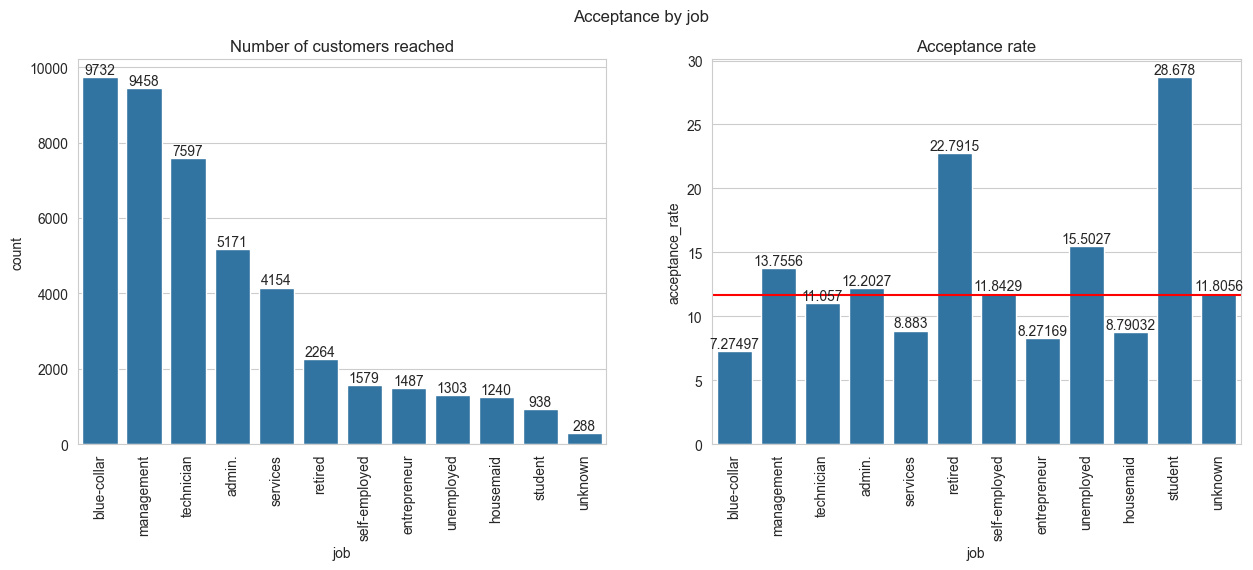

In [11]:
#Analysis by job
# Data Grouping
grouped = data.groupby(['job'])['y_numeric'].agg(['count','sum']).reset_index()
grouped['acceptance_rate'] = grouped['sum']/grouped['count'] * 100
grouped.sort_values('count',ascending=False, inplace=True)

# Data Plotting
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle('Acceptance by job')

sns.barplot(ax = ax[0], data=grouped, x='job',y='count', errwidth=0)
ax[0].set_title('Number of customers reached')
ax[0].tick_params(axis='x', labelrotation=90)

sns.barplot(ax = ax[1], data=grouped, x='job',y='acceptance_rate')
ax[1].set_title('Acceptance rate')
ax[1].tick_params(axis='x', labelrotation=90)

# Show values on charts
for i in ax[0].containers:
    ax[0].bar_label(i,)

for i in ax[1].containers:
    ax[1].bar_label(i,)

# Horizontal line with average acceptance rate
ax[1].axhline(baseline, color='red')

Students and retired individuals have the highest acceptance rates, significantly above the baseline, indicating a strong inclination towards accepting term deposit offers within these groups. Management also has a higher than average acceptance rate, while blue-collar workers are just above average. Job categories such as services, housemaid, and unemployed fall below the baseline, indicating a lower likelihood of accepting term deposit offers.

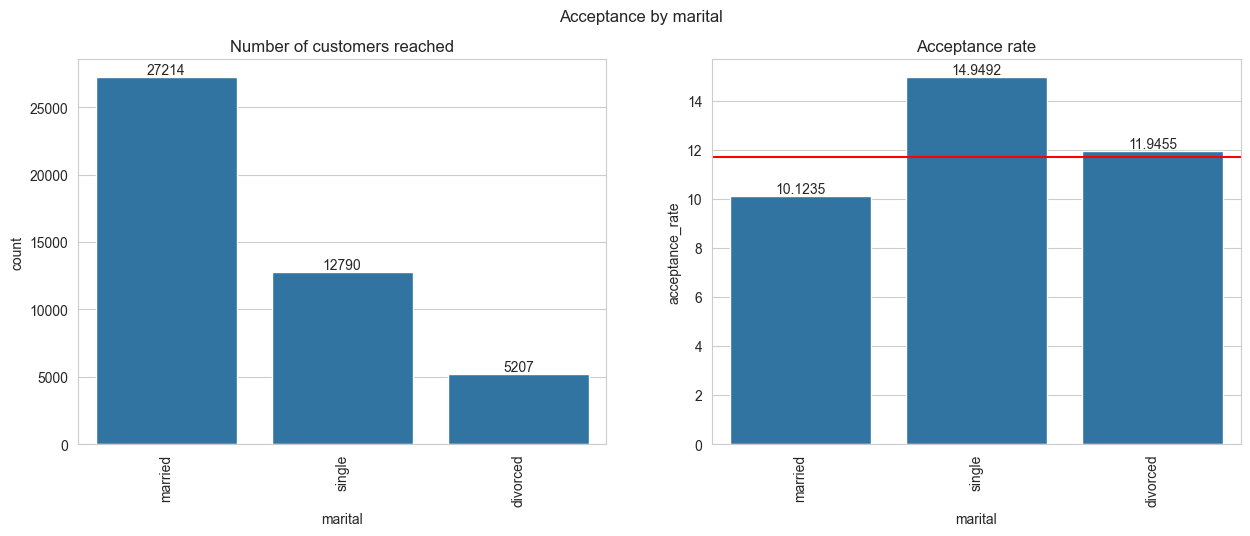

In [12]:
#Analysis by marital
# Data Grouping
grouped = data.groupby(['marital'])['y_numeric'].agg(['count','sum']).reset_index()
grouped['acceptance_rate'] = grouped['sum']/grouped['count'] * 100
grouped.sort_values('count',ascending=False, inplace=True)

# Data Plotting
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle('Acceptance by marital')

sns.barplot(ax = ax[0], data=grouped, x='marital',y='count', errwidth=0)
ax[0].set_title('Number of customers reached')
ax[0].tick_params(axis='x', labelrotation=90)

sns.barplot(ax = ax[1], data=grouped, x='marital',y='acceptance_rate')
ax[1].set_title('Acceptance rate')
ax[1].tick_params(axis='x', labelrotation=90)


# Show values on charts
for i in ax[0].containers:
    ax[0].bar_label(i,)

for i in ax[1].containers:
    ax[1].bar_label(i,)

# Horizontal line with average acceptance rate
ax[1].axhline(baseline, color='red')


Single customers show the highest propensity to subscribe to a term deposit, followed by divorced customers, both above the baseline acceptance rate. Married customers are approached most often but have a lower acceptance rate compared to the other groups.

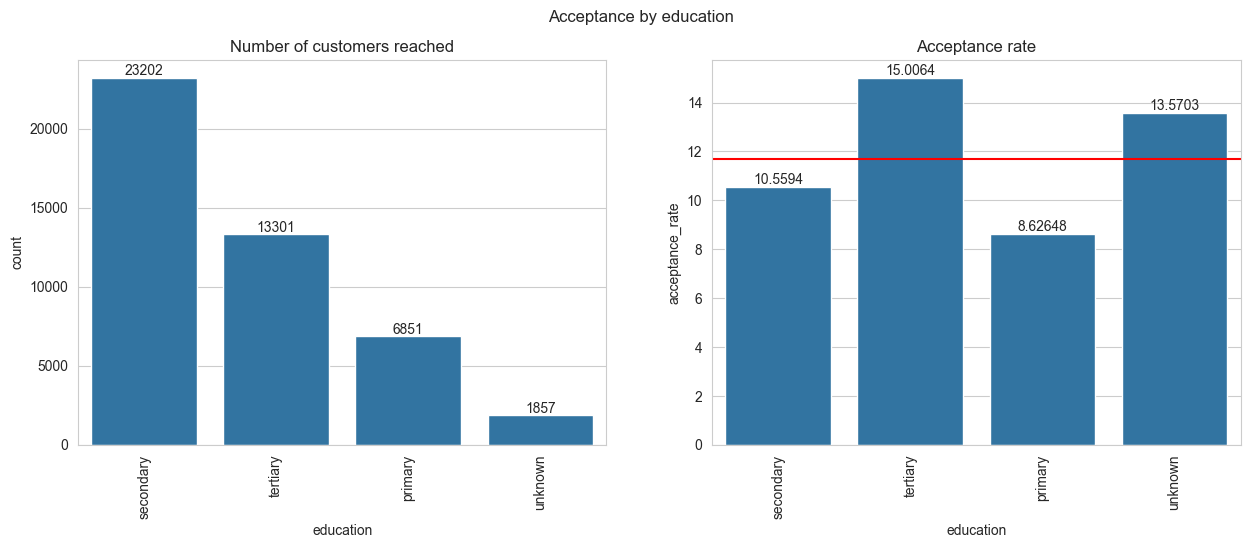

In [13]:
#Analysis by education
# Data Grouping
grouped = data.groupby(['education'])['y_numeric'].agg(['count','sum']).reset_index()
grouped['acceptance_rate'] = grouped['sum']/grouped['count'] * 100
grouped.sort_values('count',ascending=False, inplace=True)

# Data Plotting
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle('Acceptance by education')

sns.barplot(ax = ax[0], data=grouped, x='education',y='count', errwidth=0)
ax[0].set_title('Number of customers reached')
ax[0].tick_params(axis='x', labelrotation=90)

sns.barplot(ax = ax[1], data=grouped, x='education',y='acceptance_rate')
ax[1].set_title('Acceptance rate')
ax[1].tick_params(axis='x', labelrotation=90)


# Show values on charts
for i in ax[0].containers:
    ax[0].bar_label(i,)

for i in ax[1].containers:
    ax[1].bar_label(i,)

# Horizontal line with average acceptance rate
ax[1].axhline(baseline, color='red')


Individuals with tertiary education are the most likely to subscribe to a term deposit, significantly surpassing the acceptance rates of those with secondary or primary education. Those with unknown education levels still have a relatively high likelihood of subscription, potentially indicating that factors other than formal education influence their decision to subscribe. Individuals with primary education are the least likely to subscribe to term deposits among the groups represented.

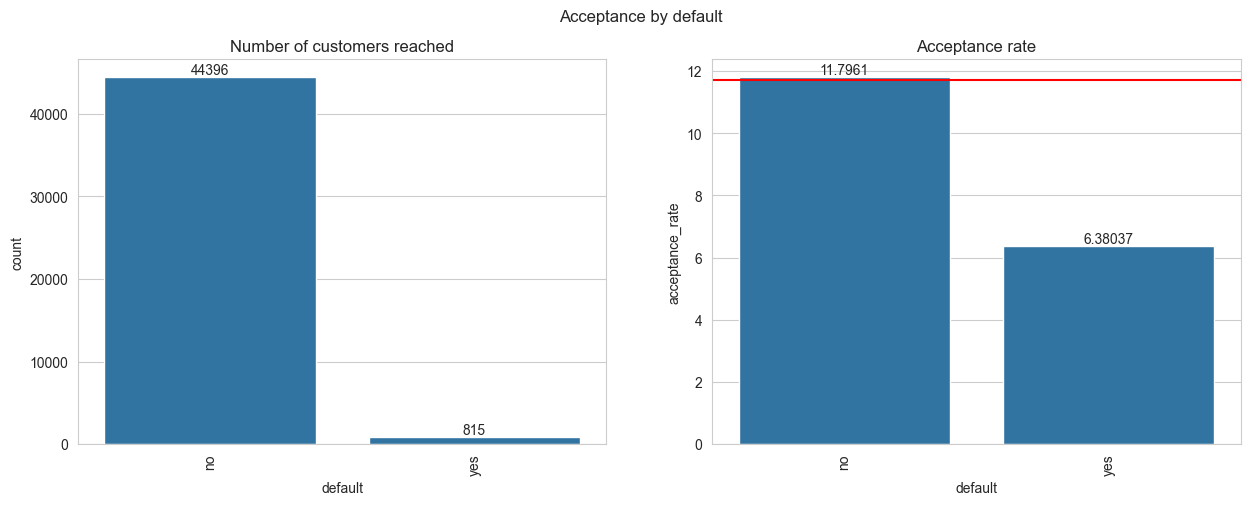

In [14]:
#Analysis by default
# Data Grouping
grouped = data.groupby(['default'])['y_numeric'].agg(['count','sum']).reset_index()
grouped['acceptance_rate'] = grouped['sum']/grouped['count'] * 100
grouped.sort_values('count',ascending=False, inplace=True)

# Data Plotting
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle('Acceptance by default')

sns.barplot(ax = ax[0], data=grouped, x='default',y='count', errwidth=0)
ax[0].set_title('Number of customers reached')
ax[0].tick_params(axis='x', labelrotation=90)

sns.barplot(ax = ax[1], data=grouped, x='default',y='acceptance_rate')
ax[1].set_title('Acceptance rate')
ax[1].tick_params(axis='x', labelrotation=90)


# Show values on charts
for i in ax[0].containers:
    ax[0].bar_label(i,)

for i in ax[1].containers:
    ax[1].bar_label(i,)

# Horizontal line with average acceptance rate
ax[1].axhline(baseline, color='red')


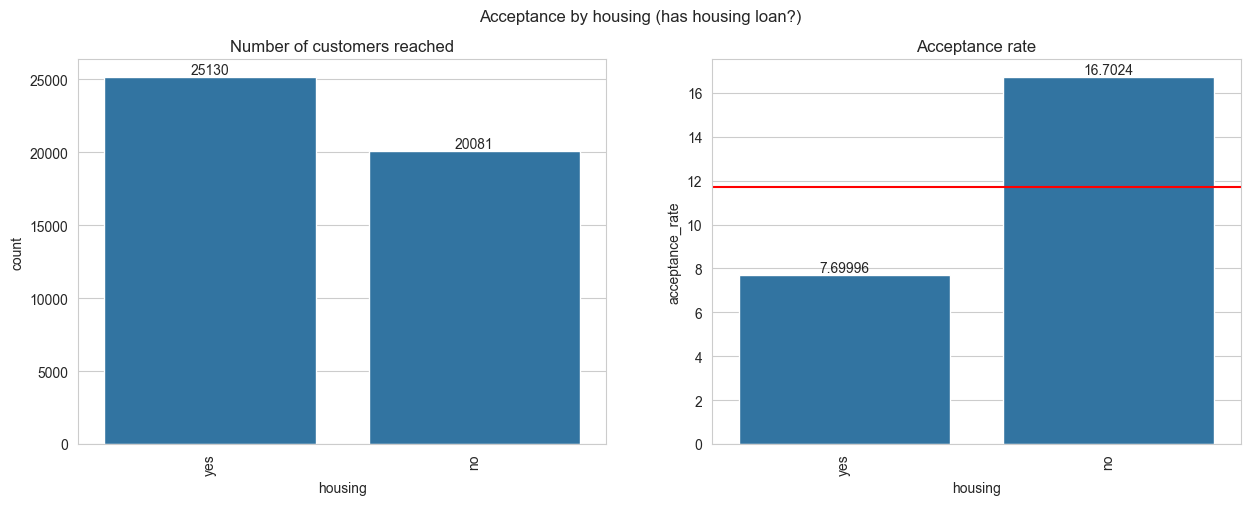

In [15]:
#Analysis by housing
# Data Grouping
grouped = data.groupby(['housing'])['y_numeric'].agg(['count','sum']).reset_index()
grouped['acceptance_rate'] = grouped['sum']/grouped['count'] * 100
grouped.sort_values('count',ascending=False, inplace=True)

# Data Plotting
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle('Acceptance by housing (has housing loan?)')

sns.barplot(ax = ax[0], data=grouped, x='housing',y='count', errwidth=0)
ax[0].set_title('Number of customers reached')
ax[0].tick_params(axis='x', labelrotation=90)

sns.barplot(ax = ax[1], data=grouped, x='housing',y='acceptance_rate')
ax[1].set_title('Acceptance rate')
ax[1].tick_params(axis='x', labelrotation=90)


# Show values on charts
for i in ax[0].containers:
    ax[0].bar_label(i,)

for i in ax[1].containers:
    ax[1].bar_label(i,)

# Horizontal line with average acceptance rate
ax[1].axhline(baseline, color='red')

Customers without a housing loan have a higher rate of accepting term deposit offers compared to those with a housing loan. This could imply that customers without the financial commitment of a housing loan might be more inclined to invest in term deposits.

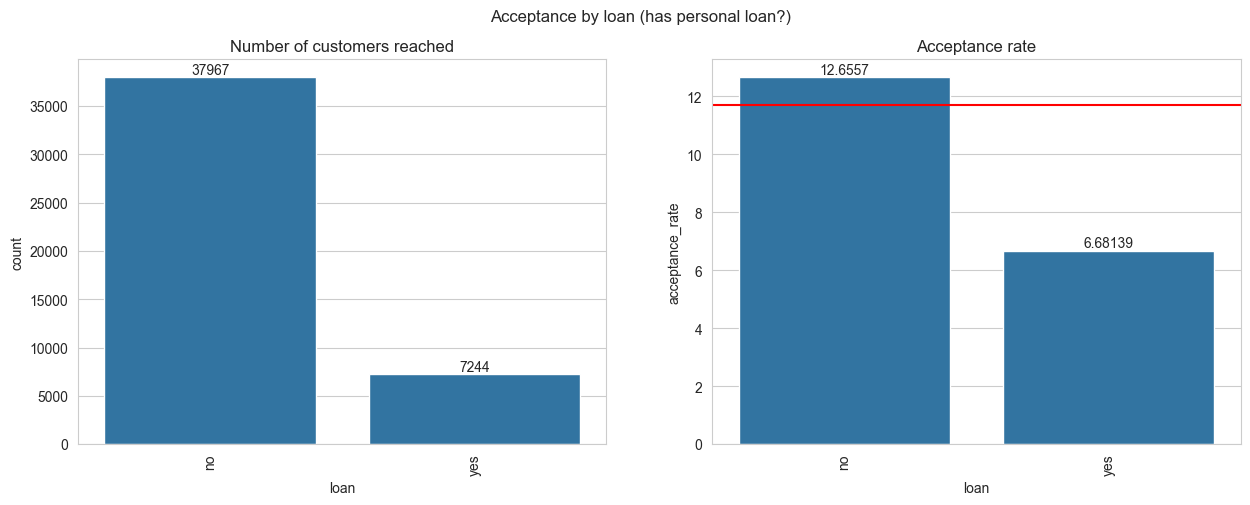

In [16]:
#Analysis by loan
# Data Grouping
grouped = data.groupby(['loan'])['y_numeric'].agg(['count','sum']).reset_index()
grouped['acceptance_rate'] = grouped['sum']/grouped['count'] * 100
grouped.sort_values('count',ascending=False, inplace=True)

# Data Plotting
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle('Acceptance by loan (has personal loan?)')

sns.barplot(ax = ax[0], data=grouped, x='loan',y='count', errwidth=0)
ax[0].set_title('Number of customers reached')
ax[0].tick_params(axis='x', labelrotation=90)

sns.barplot(ax = ax[1], data=grouped, x='loan',y='acceptance_rate')
ax[1].set_title('Acceptance rate')
ax[1].tick_params(axis='x', labelrotation=90)


# Show values on charts
for i in ax[0].containers:
    ax[0].bar_label(i,)

for i in ax[1].containers:
    ax[1].bar_label(i,)

# Horizontal line with average acceptance rate
ax[1].axhline(baseline, color='red')

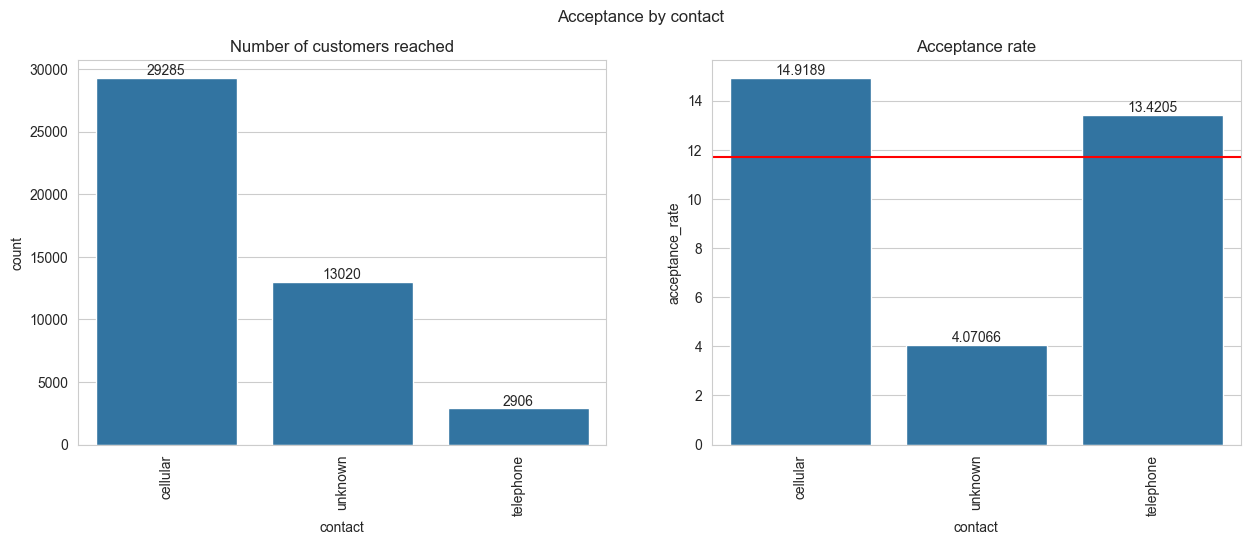

In [17]:
#Analysis by contact
# Data Grouping
grouped = data.groupby(['contact'])['y_numeric'].agg(['count','sum']).reset_index()
grouped['acceptance_rate'] = grouped['sum']/grouped['count'] * 100
grouped.sort_values('count',ascending=False, inplace=True)

# Data Plotting
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle('Acceptance by contact')

sns.barplot(ax = ax[0], data=grouped, x='contact',y='count', errwidth=0)
ax[0].set_title('Number of customers reached')
ax[0].tick_params(axis='x', labelrotation=90)

sns.barplot(ax = ax[1], data=grouped, x='contact',y='acceptance_rate')
ax[1].set_title('Acceptance rate')
ax[1].tick_params(axis='x', labelrotation=90)


# Show values on charts
for i in ax[0].containers:
    ax[0].bar_label(i,)

for i in ax[1].containers:
    ax[1].bar_label(i,)

# Horizontal line with average acceptance rate
ax[1].axhline(baseline, color='red')

Text(0, 0.5, 'Count')

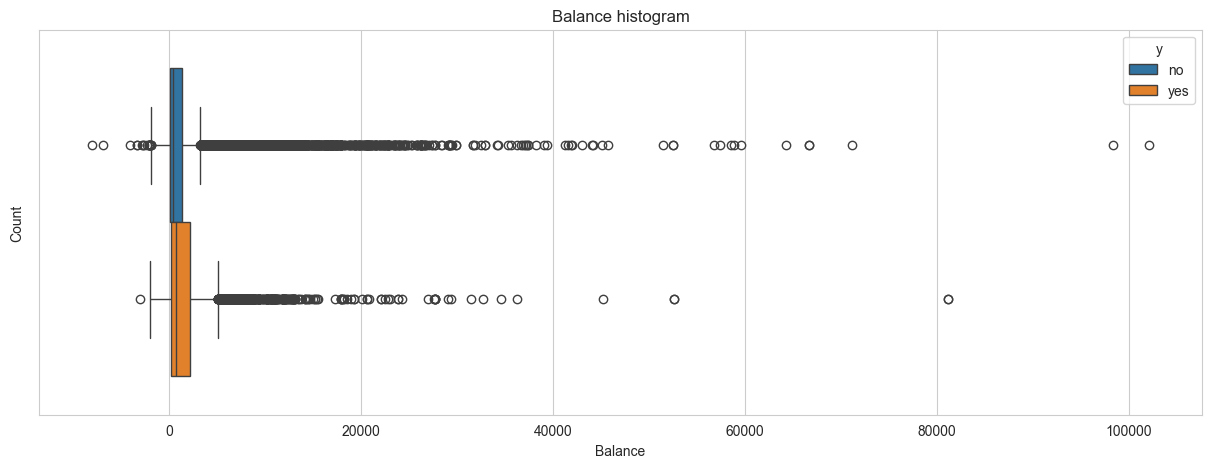

In [18]:
# Balance boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(data,x='balance',hue='y')
plt.title('Balance histogram')
plt.xlabel('Balance')
plt.ylabel('Count')

Based on the analysis of the data provided in the various charts, several conclusions can be drawn about the factors that influence a customer's likelihood to subscribe to a term deposit:

Job: Customers with certain job titles, such as students and retired individuals, have shown a higher propensity to subscribe to term deposits. This could be due to various reasons, including the potential for students to be future-oriented and interested in saving, while retired individuals may be looking for secure investment options for their savings.

Marital Status: Single customers have the highest acceptance rate for term deposits, followed by divorced customers. Married customers, despite being the largest group targeted, have a lower acceptance rate. This suggests that individuals who are not married may have more financial freedom or different financial goals that make term deposits more attractive to them.

Education: Customers with tertiary education are more likely to subscribe to a term deposit than those with primary or secondary education. This could be linked to a greater level of financial literacy or income, which often correlates with higher education levels.

Housing Loan: Customers without a housing loan have a higher acceptance rate for term deposits compared to those with a housing loan. This could indicate that customers free from larger debts or financial obligations are more likely to invest in savings products.

In conclusion, the profile of a customer more likely to subscribe to a term deposit includes being single or divorced, having a tertiary level of education, not having a housing loan, and belonging to certain job categories such as students or retirees. These factors may contribute to a customer's financial stability and freedom, as well as their knowledge and attitudes towards saving and investment, which in turn influence their decision to subscribe to term deposits. It's important to note that these are trends and generalizations, and individual decisions to subscribe to term deposits will also be influenced by a range of personal factors and circumstances.

## ➗ Split dataset in train and test

In [19]:
X = data[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']]
y = data['y_numeric']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

## 🤖 Machine Learning Model

In [20]:
# Create a comparison DataFrame
results = pd.DataFrame(columns=["Model", "Train Accuracy Score", "Test Accuracy Score", "Test Precision Score",
                                "Test Recall Score", "Average Fit Time", "Best Params"])

In [21]:
# Function to add rows to the comparison DataFrame
def results_dataframe(df, name, accuracy_score_train, accuracy_score_test, precision_score, recall_score, fit_time, best_params):
    new_row = {
        "Model": name,
        "Train Accuracy Score": accuracy_score_train,
        "Test Accuracy Score": accuracy_score_test,
        "Test Precision Score": precision_score,
        "Test Recall Score": recall_score,            
        "Average Fit Time": fit_time,
        "Best Params": best_params
        }
    
    # Convert new_row into a DataFrame and then concatenate
    new_row_df = pd.DataFrame([new_row])
    
    results = pd.concat([df, new_row_df], ignore_index=True)
    return results

In [22]:
#OneHotEncoder, OrdinalEncoder, Normalizer, PowerTransformer,FunctionTransformer

# Initialize the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

# Initialize the Normalizer
norm = Normalizer()

# Initialize the StandardScaler
st = StandardScaler()

ct = ColumnTransformer(transformers=[
    ('ohe',ohe,['job', 'marital','education','default','housing','loan','contact','month','poutcome']),
    ('st',st,['age','balance','day','duration','campaign','pdays','previous'])
    ],remainder='drop')


#### 🌲 Decision Tree

In [23]:
dtree = tree.DecisionTreeClassifier()
dtree_parameters = {'model__max_depth':[1,3,5,7,9], 'model__criterion':('gini', 'entropy')}

In [24]:
# Pipeline Decision Tree
pipe1 = Pipeline([
    ('colum_transformer',ct),
    ('model', dtree)
])

# GridSearch Decision Tree
dtree_grid = GridSearchCV(pipe1, param_grid=dtree_parameters,cv=5,scoring='accuracy')

###########################
# Fit Deciosion Tree model
start_time = time.time()

dtree_grid.fit(X_train,y_train)

fit_time = time.time() - start_time

In [25]:
# Best Parameters for Decision Tree
best_params = dtree_grid.best_params_
print(f'Best Parameters for Decision Tree: {best_params}')

Best Parameters for Decision Tree: {'model__criterion': 'gini', 'model__max_depth': 7}


In [26]:
# Prediction and Scores
# Predict for Decision Tree
predict_train = dtree_grid.predict(X_train) 
predict_test = dtree_grid.predict(X_test)

# Scores
accuracy_score_train = accuracy_score(y_train, predict_train)
accuracy_score_test = accuracy_score(y_test, predict_test)
precision_sc = precision_score(y_test, predict_test)
recall_sc = recall_score(y_test, predict_test)

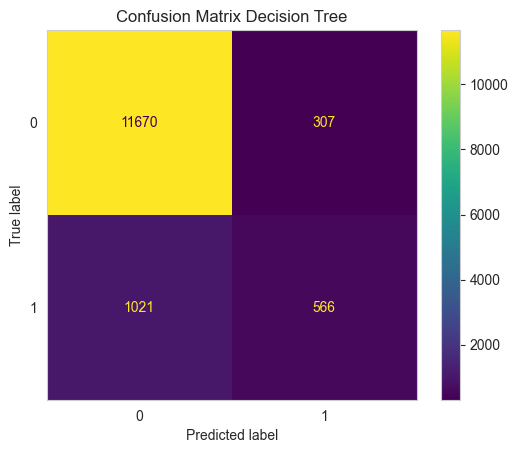

In [27]:
# Confusion Matrix Decision Tree
cm = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix Decision Tree')
plt.grid(None)
plt.show()

In [28]:
# Add result to Results DataFrame
results = results_dataframe(results, 'Decision Tree', accuracy_score_train, accuracy_score_test, precision_sc, recall_sc, fit_time, best_params)

In [29]:
# Model Score
print(f"Model accuracy score: {round(accuracy_score(y_test,predict_test),3)*100}")
print(f"Baseline: {round(100-baseline,2)}")
print(f"Gain: {round(accuracy_score(y_test,predict_test)*100 - (100-baseline),2)}")

Model accuracy score: 90.2
Baseline: 88.3
Gain: 1.91


#### 📈 Logistic Regression

In [30]:
logr = LogisticRegression(max_iter=1000)

logr_parameters = {'model__C':[0.001, 0.01, 0.1, 1, 10, 100],'model__penalty':['l1', 'l2']}

# logr_parameters = {'model__C':[0.001, 0.01, 0.1, 1, 10, 100],'model__penalty':['l1', 'l2', 'elasticnet', None],
#                     'model__solver': ['liblinear', 'saga']}

In [31]:
# Pipeline Logistic Regression

pipe_logr = Pipeline([
    ('colum_transformer',ct),
    ('model', logr)
])

# GridSearch Decision Tree
logr_grid = GridSearchCV(pipe_logr, param_grid=logr_parameters,cv=5,scoring='accuracy')

###########################
# Fit Logistic Regression model
start_time = time.time()

logr_grid.fit(X_train,y_train)

fit_time = time.time() - start_time

In [32]:
# Best Parameters for Logistic Regression

best_params = logr_grid.best_params_
print(f'Best Parameters for Logistic Regression: {best_params}')

Best Parameters for Logistic Regression: {'model__C': 1, 'model__penalty': 'l2'}


In [33]:
# Prediction and Scores
# Predict for Logistic Regression
predict_train = logr_grid.predict(X_train) 
predict_test = logr_grid.predict(X_test)

# Scores
accuracy_score_train = accuracy_score(y_train, predict_train)
accuracy_score_test = accuracy_score(y_test, predict_test)
precision_sc = precision_score(y_test, predict_test)
recall_sc = recall_score(y_test, predict_test)

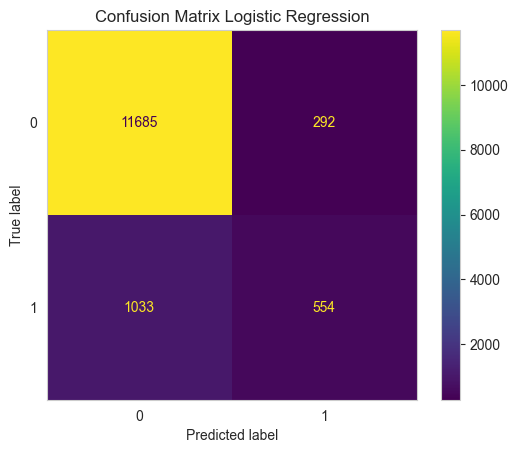

In [34]:
# Confusion Matrix Logistic Regression
cm = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix Logistic Regression')
plt.grid(None)
plt.show()

In [35]:
 # Add result to Results DataFrame
results = results_dataframe(results, 'Logistic Regression', accuracy_score_train, accuracy_score_test, precision_sc, recall_sc, fit_time, best_params)

In [36]:
# Model Score
print(f"Model accuracy score: {round(accuracy_score(y_test,predict_test),3)*100}")
print(f"Baseline: {round(100-baseline,2)}")
print(f"Gain: {round(accuracy_score(y_test,predict_test)*100 - (100-baseline),2)}")

Model accuracy score: 90.2
Baseline: 88.3
Gain: 1.93


#### ⚙️ Support Vector Machine

In [37]:
svc = SVC()

svc_parameters = {'model__kernel': ['linear', 'poly', 'rbf']}

In [38]:
# Pipeline Support Vector Machine

pipe_svc = Pipeline([
    ('colum_transformer',ct),
    ('model', svc)
])

# GridSearch Decision Tree
svc_grid = GridSearchCV(pipe_svc, param_grid=svc_parameters,cv=5,scoring='accuracy')

In [39]:
###########################
# Fit Support Vector Machine model
start_time = time.time()

svc_grid.fit(X_train,y_train)

fit_time = time.time() - start_time

In [40]:
# Best Parameters for Support Vector Machine

best_params = svc_grid.best_params_
print(f'Best Parameters for Logistic Regression: {best_params}')

Best Parameters for Logistic Regression: {'model__kernel': 'poly'}


In [41]:
# Prediction and Scores
# Predict for Support Vector Machine
predict_train = svc_grid.predict(X_train) 
predict_test = svc_grid.predict(X_test)

# Scores
accuracy_score_train = accuracy_score(y_train, predict_train)
accuracy_score_test = accuracy_score(y_test, predict_test)
precision_sc = precision_score(y_test, predict_test)
recall_sc = recall_score(y_test, predict_test)

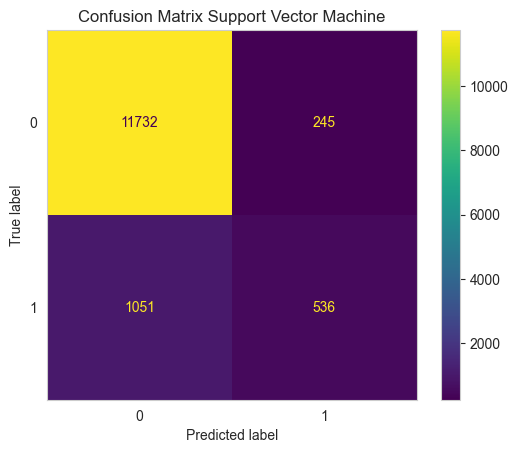

In [42]:
# Confusion Matrix Support Vector Machine
cm = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix Support Vector Machine')
plt.grid(None)
plt.show()

In [43]:
 # Add result to Results DataFrame
results = results_dataframe(results, 'Support Vector Machine', accuracy_score_train, accuracy_score_test, precision_sc, recall_sc, fit_time, best_params)

In [44]:
# Model Score
print(f"Model accuracy score: {round(accuracy_score(y_test,predict_test),3)*100}")
print(f"Baseline: {round(100-baseline,2)}")
print(f"Gain: {round(accuracy_score(y_test,predict_test)*100 - (100-baseline),2)}")

Model accuracy score: 90.4
Baseline: 88.3
Gain: 2.14


#### 🏘️ KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier()
knn_parameters = {'model__n_neighbors': range(1,30,2)}

In [46]:
# Pipeline KNeighborsClassifier

pipe_knn = Pipeline([
    ('colum_transformer',ct),
    ('model', knn)
])

# GridSearch KNeighborsClassifier
knn_grid = GridSearchCV(pipe_knn, param_grid=knn_parameters,cv=5,scoring='accuracy')

###########################
# Fit KNeighborsClassifier model
start_time = time.time()

knn_grid.fit(X_train,y_train)

fit_time = time.time() - start_time

In [47]:
# Best Parameters for KNeighborsClassifier

best_params = knn_grid.best_params_
print(f'Best Parameters for Logistic Regression: {best_params}')

Best Parameters for Logistic Regression: {'model__n_neighbors': 25}


In [48]:
# Prediction and Scores
# Predict for KNeighborsClassifier
predict_train = knn_grid.predict(X_train) 
predict_test = knn_grid.predict(X_test)

# Scores
accuracy_score_train = accuracy_score(y_train, predict_train)
accuracy_score_test = accuracy_score(y_test, predict_test)
precision_sc = precision_score(y_test, predict_test)
recall_sc = recall_score(y_test, predict_test)

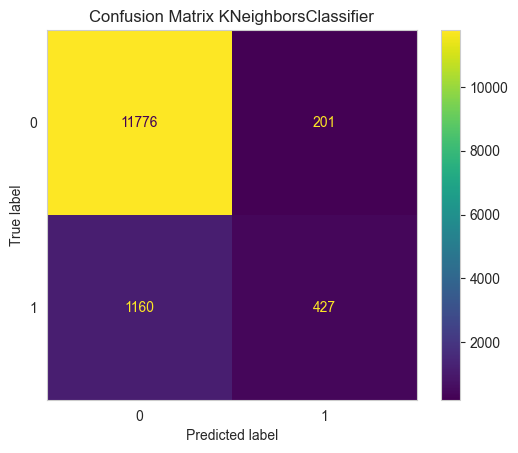

In [49]:
# Confusion Matrix KNeighborsClassifier
cm = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix KNeighborsClassifier')
plt.grid(None)
plt.show()

In [50]:
 # Add result to Results DataFrame
results = results_dataframe(results, 'KNeighborsClassifier', accuracy_score_train, accuracy_score_test, precision_sc, recall_sc, fit_time, best_params)

In [51]:
# Model Score
print(f"Model accuracy score: {round(accuracy_score(y_test,predict_test),3)*100}")
print(f"Baseline: {round(100-baseline,2)}")
print(f"Gain: {round(accuracy_score(y_test,predict_test)*100 - (100-baseline),2)}")

Model accuracy score: 90.0
Baseline: 88.3
Gain: 1.66


### Conclusion:

The confusion matrixes indicate all the models are performing reasonably well at predicting the negative class (label 0) but not as well on the positive class (label 1), which represents customers accepting the bank's term deposit offer. This is evident from the relatively high number of false negatives compared to true positives.

Considering that my goal is to predict a specific outcome accurately (customers who will accept an offer), I run all 4 models using three different scoring metrics: accuracy, f1 and recall. Accuracy might not be the best metric because the classes are imbalanced, as it can be biased towards the majority class. 

In [52]:
results

,Model,Train Accuracy Score,Test Accuracy Score,Test Precision Score,Test Recall Score,Average Fit Time,Best Params
0,Decision Tree,0.913294,0.902094,0.648339,0.356648,7.626331,"{'model__criterion': 'gini', 'model__max_depth..."
1,Logistic Regression,0.901823,0.902315,0.654846,0.349086,8.285771,"{'model__C': 1, 'model__penalty': 'l2'}"
2,Support Vector Machine,0.919740,0.904453,0.686300,0.337744,235.076553,{'model__kernel': 'poly'}
3,KNeighborsClassifier,0.903403,0.899661,0.679936,0.269061,29.481443,{'model__n_neighbors': 25}


## Accuracy Score
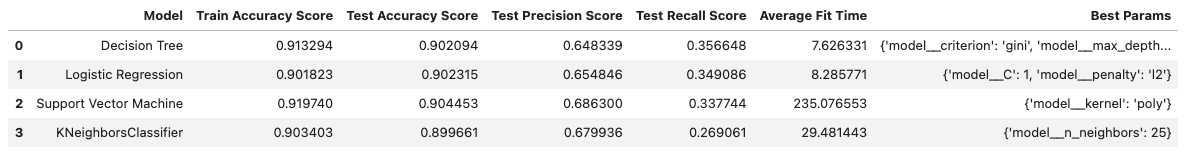

## F1 Score
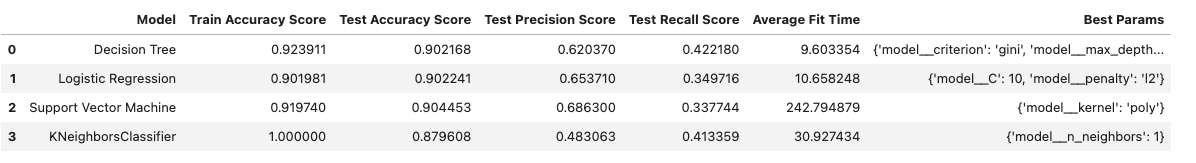

## Recal Score
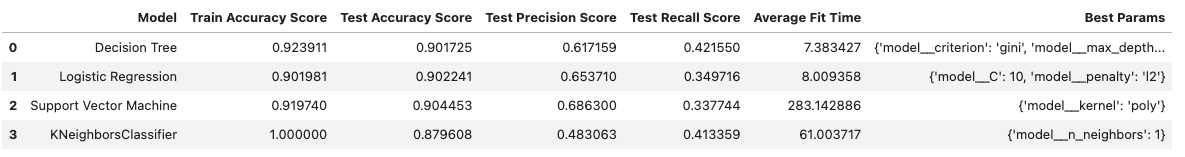

Among the four models, the model that had the best accuracy was the Support Vector Machine. In contrast, the model with the best F1 and Recall Score was Decision Tree followed by KNeighborsClassifier.

Given that my goal is to maximize the identification of customers who will accept the offer, I recommend the prioritization of recall, since it is more important to capture as many positive instances as possible (i.e., model doesn't miss out on potential customers).

This project represents a major leap forward in customer relationship management. By combining the power of AI with rich CRM data, I am setting a new standard for personalized customer engagement in the tech industry. This approach not only optimizes marketing efforts but also significantly enhances the overall customer experience, leading to sustained business growth and success.